<a href="https://colab.research.google.com/github/JacquelineGiPe/Prueba_de_repositorio/blob/main/Actividad_3_M%C3%A9todos_de_aprendizaje_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 3 - Métodos de aprendizaje supervisado**


*   JACQUELINE GIRALDO PELAEZ
*   BYRON STIVEN HOYOS OQUENDO



Objetivo: Queremos predecir el flujo de pasajeros en una estación de transporte masivo en función de variables como hora del día, día de la semana, clima, y eventos especiales.



# Generamos del Dataset


In [2]:
import pandas as pd
import numpy as np

# Configuración inicial
np.random.seed(42)
n_samples = 1000

# Variables simuladas
data = {
    "hora": np.random.randint(0, 24, size=n_samples), # Hora del día
    "dia_semana": np.random.choice(["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"], n_samples),
    "clima": np.random.choice(["Soleado", "Lluvioso", "Nublado"], n_samples),
    "evento_especial": np.random.choice([0, 1], n_samples), # 0: no, 1: sí
    "pasajeros": np.random.randint(50, 1000, size=n_samples) # Flujo de pasajeros
}

# Creamos DataFrame
df = pd.DataFrame(data)

# Exportamos el dataset convirtiendolo a formato csv
df.to_csv("transporte_masivo.csv", index=False)
print(df.head())


   hora dia_semana     clima  evento_especial  pasajeros
0     6    Domingo  Lluvioso                1        549
1    19      Lunes   Nublado                0        962
2    14     Martes   Soleado                0        158
3    10     Sábado   Soleado                1        785
4     7     Sábado   Soleado                1        327


In [3]:
#Visualizamos mas el dataset
df

,hora,dia_semana,clima,evento_especial,pasajeros
0,6,Domingo,Lluvioso,1,549
1,19,Lunes,Nublado,0,962
2,14,Martes,Soleado,0,158
3,10,Sábado,Soleado,1,785
4,7,Sábado,Soleado,1,327
...,...,...,...,...,...
995,19,Domingo,Lluvioso,0,224
996,0,Sábado,Nublado,0,158
997,19,Sábado,Lluvioso,0,232
998,16,Viernes,Lluvioso,0,241


## Preprocesamiento
Preparamos los datos para el modelo (transformar variables categóricas, dividir en entrenamiento y prueba)

In [4]:
from sklearn.model_selection import train_test_split # Divide los arrays o matrices en subgrupos de entrenamiento y testeo
from sklearn.preprocessing import OneHotEncoder # para transformar las varibles categóricas en binarias
from sklearn.compose import ColumnTransformer # permite aplicar transformaciones específicas a cada tipo de columna de manera eficiente
from sklearn.pipeline import Pipeline # para encadenar varios pasos de procesamiento y el modelo en un solo objeto

# Dividir características y etiquetas
X = df.drop("pasajeros", axis=1) # guardamos datframe sin columna pasajeros
y = df["pasajeros"] # lo que queremos predecir

# Convertir variables categóricas a formato numérico
categorical_features = ["dia_semana", "clima"]
numeric_features = ["hora", "evento_especial"]

# Crear preprocesador para convetir las variables categoricas
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_features)
    ],
    remainder="passthrough" # Dejar las columnas numéricas como están
)

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% para prueba y 80% entrenamiento; y 42 para controlar
#  la aleatoriedad en la división de los datos entre los conjuntos de entrenamiento y prueba


## Entrenamiento del Modelo
Usaremos un modelo de regresión lineal para predecir el flujo de pasajeros.

In [5]:
from sklearn.linear_model import LinearRegression # para crear un modelo de regresion lineal
from sklearn.metrics import mean_squared_error # para calcula el error, (que tan lejos podrian estar las predicciones)

# Crear pipeline (agrupa los paso del proceso en un objeto) con preprocesador y modelo
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),   # crea un pipeline que primero procesara los datos y luego hace la regresion lineal.
    ("model", LinearRegression())
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predicciones
y_pred = pipeline.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")


Error cuadrático medio (MSE): 69320.18063334981


## Resultados y Exportación
Exportar el modelo para uso futuro.

In [ ]:
import joblib

# Guardar el modelo
joblib.dump(pipeline, "modelo_transporte_masivo.pkl")


['modelo_transporte_masivo.pkl']

# Algunos graficos

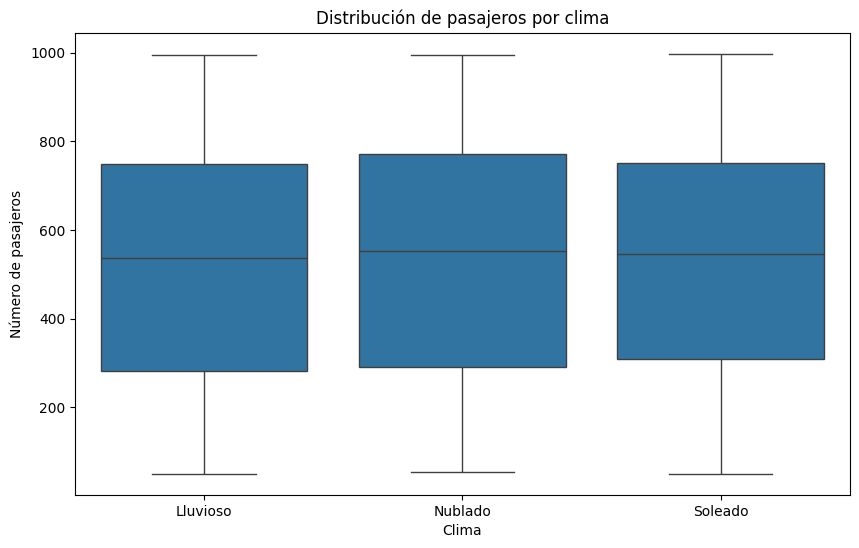

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="clima", y="pasajeros", data=df)
plt.title("Distribución de pasajeros por clima")
plt.xlabel("Clima")
plt.ylabel("Número de pasajeros")
plt.show()

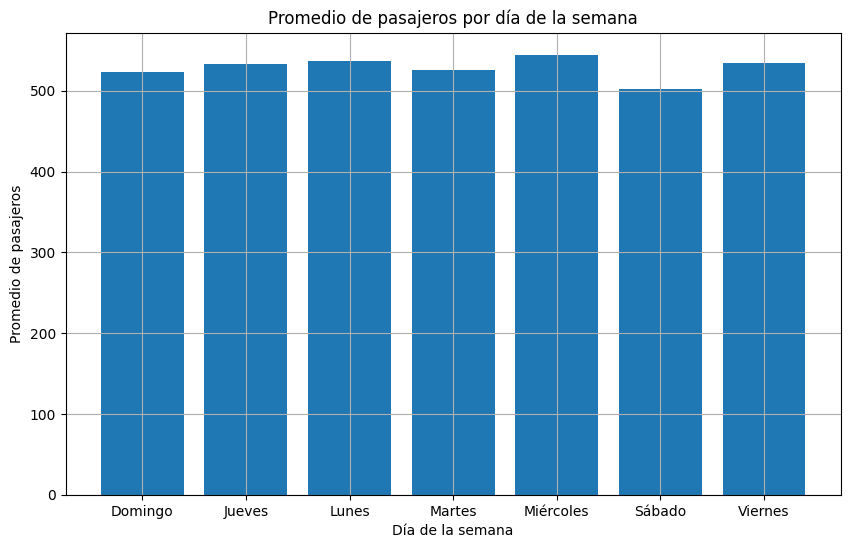

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("transporte_masivo.csv")

# Calcular el promedio de pasajeros por día de la semana
promedio_pasajeros = df.groupby("dia_semana")["pasajeros"].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(promedio_pasajeros.index, promedio_pasajeros.values)
plt.title("Promedio de pasajeros por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Promedio de pasajeros")
plt.grid(True)
plt.show()

# Poniendo a prueba el modelo

In [ ]:
import joblib

# Cargar el modelo guardado
modelo_cargado = joblib.load("modelo_transporte_masivo.pkl")


In [ ]:
import pandas as pd

# Nuevos datos de prueba
nuevos_datos = pd.DataFrame({
    "hora": [8, 18, 22],
    "dia_semana": ["Lunes", "Viernes", "Sábado"],
    "clima": ["Soleado", "Lluvioso", "Nublado"],
    "evento_especial": [0, 1, 0]
})

print(nuevos_datos)


   hora dia_semana     clima  evento_especial
0     8      Lunes   Soleado                0
1    18    Viernes  Lluvioso                1
2    22     Sábado   Nublado                0


In [ ]:
# Predicciones con los nuevos datos
predicciones = modelo_cargado.predict(nuevos_datos)

# Mostrar resultados
for i, prediccion in enumerate(predicciones):
    print(f"Predicción para instancia {i+1}: {prediccion:.2f} pasajeros")


Predicción para instancia 1: 528.83 pasajeros
Predicción para instancia 2: 532.64 pasajeros
Predicción para instancia 3: 516.11 pasajeros


In [ ]:
# Datos reales de ejemplo (si están disponibles)
pasajeros_reales = [120, 800, 300]

# Calcular el error absoluto medio
errores = [abs(real - pred) for real, pred in zip(pasajeros_reales, predicciones)]
mae = sum(errores) / len(errores)
print(f"Error absoluto medio (MAE): {mae:.2f}")


Error absoluto medio (MAE): 297.43
